## Helper functions for adding highlighted and cropped bboxes

In [7]:
import os
from PIL import Image, ImageDraw,ImageFont
import urllib

bboxed_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/bboxed_images_highlighted"
cropped_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/cropped_images"

global_clues = []
def create_bboxed_highlighted_image(input,split):

    instance_id = input['instance_id']
    url = input['inputs']['image']['url']

    IMG_ROOT = "/data/tir/projects/tir4/users/svarna/Sherlock/data/"
    if 'vcr' in url:
        img_path = IMG_ROOT + "VCR/"
        base_url = 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/'
        sub_path = url[len(base_url):]
        img_path += sub_path

    elif 'VG' in url:
        img_path = IMG_ROOT + "VG/"
        base_url = 'https://cs.stanford.edu/people/rak248/'
        sub_path = url[len(base_url):]
        img_path += sub_path
    
    else:
        print(url)
        print("error - not found image")


    # Create image with a highlighted bbox around the clue
    img = Image.open(img_path)
    img = img.convert('RGBA')
    overlay = Image.new('RGBA', img.size, '#00000000')
    draw = ImageDraw.Draw(overlay, 'RGBA')

    bboxes = input['inputs']['bboxes']
    if len(bboxes) > 1:
        global_clues.append(instance_id)

    for bbox in bboxes:
        x, y, h, w = bbox['left'],bbox['top'],bbox['height'],bbox['width']
        draw.rectangle((x, y, x + w, y + h), fill='#ff05cd3c', outline='#05ff37ff', width=3)
        
    img = Image.alpha_composite(img, overlay)

    img.save(f"{bboxed_img_path}/{split}/{instance_id}.png")

In [3]:
import os
from PIL import Image, ImageDraw,ImageFont
import urllib


cropped_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/cropped_images"

global_clues = []
def create_cropped_image(input,split):

    instance_id = input['instance_id']
    url = input['inputs']['image']['url']

    IMG_ROOT = "/data/tir/projects/tir4/users/svarna/Sherlock/data/"
    if 'vcr' in url:
        img_path = IMG_ROOT + "VCR/"
        base_url = 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/'
        sub_path = url[len(base_url):]
        img_path += sub_path

    elif 'VG' in url:
        img_path = IMG_ROOT + "VG/"
        base_url = 'https://cs.stanford.edu/people/rak248/'
        sub_path = url[len(base_url):]
        img_path += sub_path
    
    else:
        print(url)
        print("error - not found image")

    bboxes = input['inputs']['bboxes']
    if len(bboxes) > 1:
        global_clues.append(instance_id)

    # Save the cropped part of the image using first bbox
    for j in range(len(bboxes)):
        bbox = bboxes[j]
        x, y, h, w = bbox['left'],bbox['top'],bbox['height'],bbox['width']
        img = Image.open(img_path)
        img = img.crop((x, y, x + w, y + h))
        img.save(f"{cropped_img_path}/{split}/{instance_id}_{j}.jpg")

{'instance_id': '1e841daa11e7903f2612dd17157894ea', 'targets': {'inference': 'They are a couple.'}, 'inputs': {'bboxes': [{'height': 1027, 'left': 582, 'top': 54, 'width': 787}, {'height': 826, 'left': 1317, 'top': 255, 'width': 470}], 'clue': 'Man and woman standing side by side.', 'confidence': 1.0, 'image': {'height': 1080, 'url': 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/movieclips_Daddys_Home/Iii55E60gfg@26.jpg', 'width': 1920}, 'obs_idx': 0}, 'split_idx': 7}


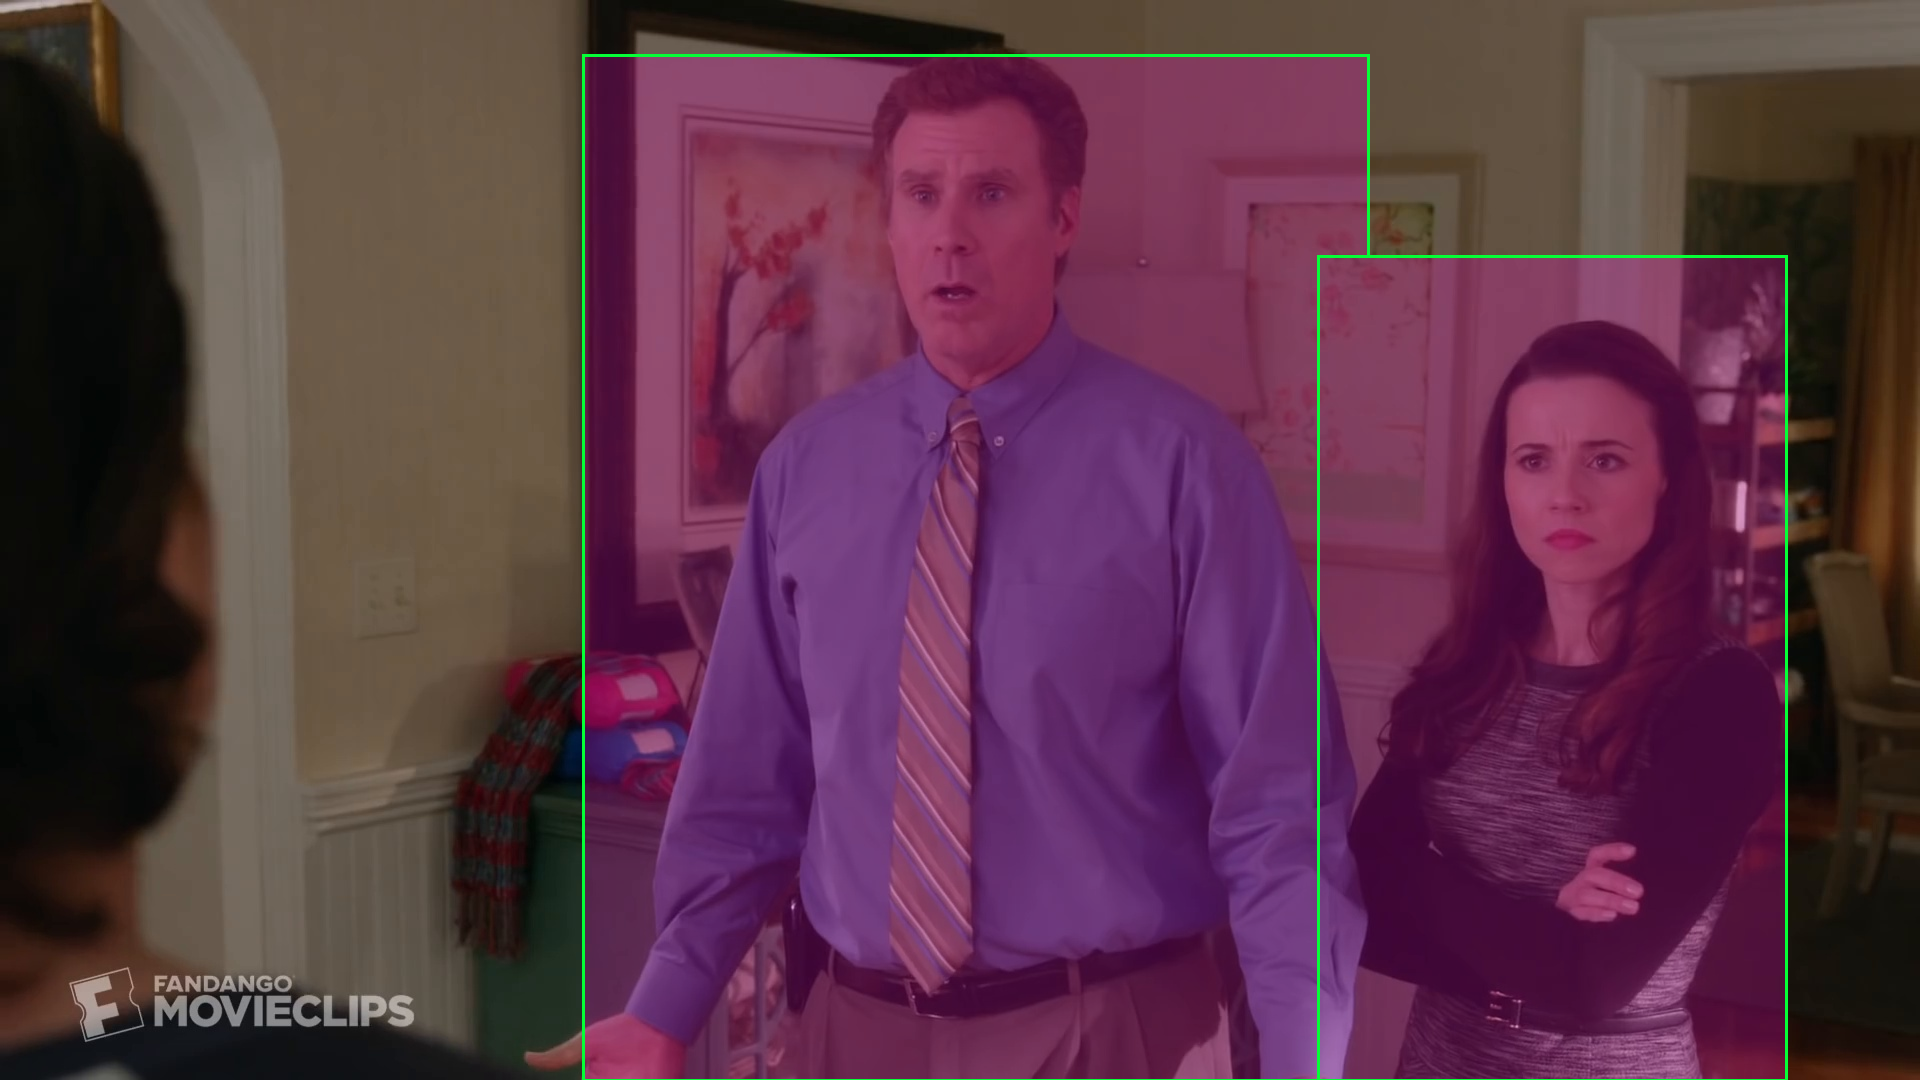

In [9]:
bboxed_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/bboxed_images_highlighted"
with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_test.json','r') as f_in:
    test_objects = json.load(f_in)


instance_id = '1e841daa11e7903f2612dd17157894ea'
for obj in test_objects:
    if obj['instance_id'] == instance_id:
        print(obj)
        img = Image.open(f"{bboxed_img_path}/test/{instance_id}.png")
        display(img)

In [6]:
from tqdm import tqdm
import json

with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_train.json','r') as f_in:
    training_objects = json.load(f_in)

for object in tqdm(training_objects):
    create_bboxed_highlighted_image(object,'train')

  0%|          | 0/25364 [00:00<?, ?it/s]

100%|██████████| 25364/25364 [10:31<00:00, 40.18it/s]


In [3]:
import json
with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_val.json','r') as f_in:
    val_objects = json.load(f_in)

for object in val_objects:
    create_bboxed_highlighted_image(object,'validation')

In [5]:
with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_test.json','r') as f_in:
    test_objects = json.load(f_in)

for object in test_objects:
    create_bboxed_highlighted_image(object,'test')

In [4]:
import json
from tqdm import tqdm 

with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_train.json','r') as f_in:
    test_objects = json.load(f_in)

for object in tqdm(test_objects):
    create_cropped_image(object,'train')

100%|██████████| 25364/25364 [02:51<00:00, 148.06it/s]


In [ ]:
import json
from tqdm import tqdm 

with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_test.json','r') as f_in:
    test_objects = json.load(f_in)

for object in tqdm(test_objects):
    create_cropped_image(object,'test')

## Constructing metadata for training

In [4]:
import json
with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_train.json','r') as f_in:
    training_objects = json.load(f_in)

with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_val.json','r') as f_in:
    val_objects = json.load(f_in)

with open('/data/tir/projects/tir4/users/svarna/Sherlock/data/subset_test.json','r') as f_in:
    test_objects = json.load(f_in)

In [3]:
bboxed_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/metadata"

bbox_objects = []
crop_objects = []

for object in training_objects:
    clue = object['inputs']['clue']
    inference = object['targets']['inference']
    id = object['instance_id']

    formatted_caption = f"{clue}, Inference: {inference}"
    bbox_path = f"{id}.jpg"
    crop_path = f"{id}.jpg"

    bbox_objects.append({"file_name":bbox_path,"text":id})
    crop_objects.append({"file_name":crop_path,"text":id})

with open(f'{bboxed_img_path}/train_metadata_id.jsonl','w') as f_out:
    for obj in bbox_objects:
        f_out.write(json.dumps(obj) + "\n")

In [4]:
bboxed_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/metadata"

bbox_objects = []
crop_objects = []

for object in val_objects:
    clue = object['inputs']['clue']
    inference = object['targets']['inference']
    id = object['instance_id']

    formatted_caption = f"{clue}, Inference: {inference}"
    bbox_path = f"{id}.jpg"
    crop_path = f"{id}.jpg"

    bbox_objects.append({"file_name":bbox_path,"text":id})
    crop_objects.append({"file_name":crop_path,"text":id})

with open(f'{bboxed_img_path}/val_metadata_id.jsonl','w') as f_out:
    for obj in bbox_objects:
        f_out.write(json.dumps(obj) + "\n")

In [7]:
bboxed_img_path = "/data/tir/projects/tir7/user_data/vishwavs/mmml_2024/metadata"

bbox_objects = []
crop_objects = []

for object in test_objects:
    clue = object['inputs']['clue']
    inference = object['targets']['inference']
    id = object['instance_id']

    formatted_caption = f"{clue}, Inference: {inference}"
    bbox_path = f"{id}.jpg"
    crop_path = f"{id}.jpg"

    bbox_objects.append({"file_name":bbox_path,"text":id})
    crop_objects.append({"file_name":crop_path,"text":id})

with open(f'{bboxed_img_path}/test_metadata_id.jsonl','w') as f_out:
    for obj in bbox_objects:
        f_out.write(json.dumps(obj) + "\n")